<a href="https://colab.research.google.com/github/MattLeRoi/new_project/blob/main/index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tech_Use_Stress_Wellness

In [1]:
import pandas as pd
health = pd.read_csv('https://github.com/MattLeRoi/new_project/raw/refs/heads/main/Tech_Use_Stress_Wellness.csv')
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   user_id                           5000 non-null   int64  
 1   age                               5000 non-null   int64  
 2   gender                            5000 non-null   object 
 3   daily_screen_time_hours           5000 non-null   float64
 4   phone_usage_hours                 5000 non-null   float64
 5   laptop_usage_hours                5000 non-null   float64
 6   tablet_usage_hours                5000 non-null   float64
 7   tv_usage_hours                    5000 non-null   float64
 8   social_media_hours                5000 non-null   float64
 9   work_related_hours                5000 non-null   float64
 10  entertainment_hours               5000 non-null   float64
 11  gaming_hours                      5000 non-null   float64
 12  sleep_

(array([615., 585., 689., 692., 675., 568., 443., 345., 220., 168.]),
 array([ 0. ,  2.1,  4.2,  6.3,  8.4, 10.5, 12.6, 14.7, 16.8, 18.9, 21. ]),
 <BarContainer object of 10 artists>)

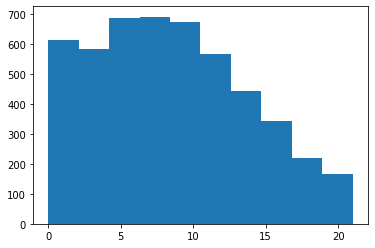

In [2]:
import matplotlib.pyplot as plt

plt.hist(health.weekly_anxiety_score)

In [3]:
health.head()

,user_id,age,gender,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,...,stress_level,physical_activity_hours_per_week,location_type,mental_health_score,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,weekly_anxiety_score,weekly_depression_score,mindfulness_minutes_per_day
0,1,53,Male,6.8,2.9,2.1,0.5,2.0,2.3,3.0,...,3,4.4,Rural,79.0,True,True,150.4,7.0,3.0,14.0
1,2,66,Female,4.1,2.1,1.6,0.4,0.8,2.8,3.5,...,4,4.1,Rural,71.0,True,True,124.1,7.0,10.0,15.5
2,3,43,Male,4.7,3.6,0.0,0.5,1.4,3.7,3.6,...,6,1.4,Urban,67.0,True,True,218.3,11.0,7.0,19.5
3,4,29,Female,6.0,4.5,0.0,0.2,1.3,4.5,4.0,...,10,0.0,Rural,55.0,True,True,133.7,17.0,14.0,13.9
4,5,57,Male,6.7,3.4,2.0,0.8,1.2,3.8,3.5,...,6,2.8,Urban,62.0,False,False,192.8,5.0,8.0,26.7


In [4]:
from sklearn.model_selection import train_test_split

# health.loc[health['stress_level'] == 10, 'stress_level_cat'] = 2
health.loc[health['stress_level'] >= 7, 'stress_level_cat'] = 1
health.loc[health['stress_level'] < 7, 'stress_level_cat'] = 0
effects = ['stress_level', 'stress_level_cat', 'mood_rating', 'mental_health_score', 'weekly_anxiety_score', 'weekly_depression_score']
tbd_features = ['location_type', 'gender', ]

X = health.drop(effects+tbd_features+['user_id'], axis=1)
y = health['stress_level_cat'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,age,daily_screen_time_hours,phone_usage_hours,laptop_usage_hours,tablet_usage_hours,tv_usage_hours,social_media_hours,work_related_hours,entertainment_hours,gaming_hours,sleep_duration_hours,sleep_quality,physical_activity_hours_per_week,uses_wellness_apps,eats_healthy,caffeine_intake_mg_per_day,mindfulness_minutes_per_day
4227,61,4.8,2.3,2.4,0.3,1.1,3.9,3.4,2.0,1.3,7.3,4.0,1.8,True,False,165.4,21.6
4676,65,1.5,1.5,0.0,0.2,1.2,1.8,3.4,2.2,2.9,7.3,5.0,5.1,False,True,145.3,23.2
800,23,5.6,2.0,0.2,1.4,1.7,4.5,4.1,0.7,1.0,6.9,4.0,0.0,False,False,94.8,11.8
3671,61,2.0,1.2,1.0,0.8,0.0,1.4,2.3,3.4,2.2,7.5,5.0,4.2,True,True,137.3,18.3
4193,44,1.6,0.3,1.6,0.2,0.6,0.7,1.5,2.1,2.9,7.8,5.0,5.2,True,False,230.8,30.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,35,7.1,2.9,2.2,0.7,2.1,4.5,3.9,1.1,1.4,6.8,4.0,0.0,False,True,42.2,17.2
466,68,2.7,1.8,0.1,0.5,1.7,2.6,3.0,1.6,1.7,8.5,4.0,7.2,True,True,212.0,26.4
3092,48,6.0,1.5,2.5,0.6,2.6,3.7,3.9,1.6,0.9,7.4,4.0,2.8,False,True,120.2,22.0
3772,57,3.2,1.6,0.4,0.3,2.0,2.8,3.7,1.8,1.1,7.9,5.0,1.6,False,False,44.0,14.6


In [5]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\mleroi\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [6]:
from sklearn.metrics import classification_report

y_pred =  model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.96       604
         1.0       0.94      0.95      0.94       396

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.96      0.95      0.96      1000



# Accident prediction - Kaggle competition

In [7]:
accident_train = pd.read_csv('./accident_predict/train.csv')
accident_test = pd.read_csv('./accident_predict/test.csv')

In [8]:
accident_train

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517749,517749,highway,4,0.10,70,daylight,foggy,True,True,afternoon,False,False,2,0.32
517750,517750,rural,4,0.47,35,daylight,rainy,True,True,morning,False,False,1,0.26
517751,517751,urban,4,0.62,25,daylight,foggy,False,False,afternoon,False,True,0,0.19
517752,517752,highway,3,0.63,25,night,clear,True,False,afternoon,True,True,3,0.51


# Bank

In [9]:
bank_train = pd.read_csv('./bank/train.csv').drop('id', axis=1)
bank_test = pd.read_csv('./bank/test.csv').drop('id', axis=1)
bank_train_X = bank_train.drop(['y'], axis=1)
bank_train_y = bank_train.y

bank_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   age        750000 non-null  int64 
 1   job        750000 non-null  object
 2   marital    750000 non-null  object
 3   education  750000 non-null  object
 4   default    750000 non-null  object
 5   balance    750000 non-null  int64 
 6   housing    750000 non-null  object
 7   loan       750000 non-null  object
 8   contact    750000 non-null  object
 9   day        750000 non-null  int64 
 10  month      750000 non-null  object
 11  duration   750000 non-null  int64 
 12  campaign   750000 non-null  int64 
 13  pdays      750000 non-null  int64 
 14  previous   750000 non-null  int64 
 15  poutcome   750000 non-null  object
 16  y          750000 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 97.3+ MB


In [10]:
categorical_features = ['job','marital','education','default','housing','loan','contact','month','poutcome']

# Convert to pandas categoricals (needed for automatic handling)
for col in categorical_features:
    bank_train_X[col] = bank_train_X[col].astype("category").cat.codes

    
X,X_val,y,y_val = train_test_split(bank_train_X,bank_train_y,random_state=42)
print(bank_train_X.dtypes)

age          int64
job           int8
marital       int8
education     int8
default       int8
balance      int64
housing       int8
loan          int8
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
dtype: object


In [11]:
from sklearn.ensemble import HistGradientBoostingClassifier
assert isinstance(X, pd.DataFrame)   
model = HistGradientBoostingClassifier()
model.fit(X, y)

# Predict
y_pred = model.predict(X_val)


In [12]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_val, y_pred)
print("ROC AUC Score:", roc_auc)

ROC AUC Score: 0.8199645616835964


In [13]:
X.campaign.value_counts()

campaign
1     228463
2     157351
3      66489
4      45691
5      19308
6      14776
7       7778
8       5818
9       2994
10      2603
11      1920
12      1529
13      1279
14       930
15       794
16       776
17       674
18       508
19       416
20       370
21       306
22       215
25       181
23       175
24       170
29       137
28       130
31       117
26       109
27        81
30        79
32        69
33        44
35        41
34        33
37        22
36        21
38        19
43        15
41        12
50        11
44         9
46         8
40         6
39         6
51         6
45         4
42         2
48         2
63         1
55         1
58         1
Name: count, dtype: int64

In [14]:
bfu = pd.read_csv('./bank/bank-full.csv', delimiter=';')

In [15]:
bfu

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [38]:
bank=pd.read_csv('./bank/bank.csv', delimiter=';')

In [39]:
bfu.duplicated().sum()

0

In [42]:
combined=pd.concat([bank,bfu])

In [43]:
combined.duplicated().sum()

4521

In [16]:
result = bfu.assign(y_binary=(bfu['y'] == 'yes').astype(int)) \
            .groupby('day')['y_binary'].mean() * 100

In [17]:
result

day
1     27.950311
2     14.075793
3     16.496756
4     15.916955
5     11.256545
6      9.368530
7      8.640616
8     10.912052
9     11.467008
10    23.091603
11    12.237999
12    15.221460
13    15.205047
14    11.363636
15    13.975338
16    13.568905
17     9.076844
18     9.878683
19     6.943654
20     6.976744
21     9.921027
22    17.016575
23    13.418530
24    13.870246
25    15.833333
26    11.207729
27    13.380910
28     7.814208
29     7.392550
30    17.305236
31     7.153966
Name: y_binary, dtype: float64

In [18]:
bfu.day.value_counts()

day
20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: count, dtype: int64

# -----------------  Not used ---------------------------

## global_superstore

In [19]:
# pip install pandas openpyxl

In [20]:
import pandas as pd

# Read the entire Excel file into a DataFrame (defaults to the first sheet)
df = pd.read_excel('https://github.com/MattLeRoi/new_project/raw/refs/heads/main/Global%20Superstore%20Data.xlsx')

In [21]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Postal Code,City,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.82,2,0.0,102.42,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.54,9,0.0,104.49,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.32,3,0.0,13.77,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,NaN,Herat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.68,4,0.0,79.68,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,NaN,Herat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.88,4,0.0,24.36,5.72,Medium


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Pr

In [23]:
df.drop('Postal Code', axis=1, inplace=True)

In [24]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Product Name,Sub-Category,Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,24599,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,FUR-BO-4861,"Ikea Library with Doors, Mobile",Bookcases,Furniture,731.820,2,0.0,102.420,39.66,Medium
1,29465,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,...,OFF-SU-2988,"Acme Scissors, Easy Grip",Supplies,Office Supplies,243.540,9,0.0,104.490,18.72,Medium
2,24598,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,TEC-MA-4211,"Epson Receipt Printer, White",Machines,Technology,346.320,3,0.0,13.770,14.10,Medium
3,24597,IN-2017-CA120551-42816,2017-03-22,2017-03-29,Standard Class,CA-120551,Cathy Armstrong,Home Office,Herat,Hirat,...,FUR-FU-5726,"Rubbermaid Door Stop, Erganomic",Furnishings,Furniture,169.680,4,0.0,79.680,11.01,Medium
4,29464,ID-2015-BD116051-42248,2015-09-01,2015-09-04,Second Class,BD-116051,Brian Dahlen,Consumer,Herat,Hirat,...,OFF-EN-3664,"Cameo Interoffice Envelope, with clear poly wi...",Envelopes,Office Supplies,203.880,4,0.0,24.360,5.72,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,46231,ZA-2014-AS285147-41718,2014-03-20,2014-03-25,Standard Class,AS-285147,Alejandro Savely,Corporate,Harare,Harare,...,OFF-AR-5911,"Sanford Highlighters, Easy-Erase",Art,Office Supplies,9.612,2,0.7,-21.168,1.02,Medium
51286,50122,ZA-2017-HG4965147-42876,2017-05-21,2017-05-23,Second Class,HG-4965147,Henry Goldwyn,Corporate,Mutare,Manicaland,...,OFF-LA-3260,"Avery Color Coded Labels, 5000 Label Set",Labels,Office Supplies,4.104,1,0.7,-4.806,1.80,High
51287,50297,ZA-2016-EB3870147-42499,2016-05-09,2016-05-15,Standard Class,EB-3870147,Emily Burns,Consumer,Mutare,Manicaland,...,OFF-AR-5922,"Sanford Pencil Sharpener, Fluorescent",Art,Office Supplies,7.749,1,0.7,-9.051,1.46,Medium
51288,47164,ZA-2015-JG5115147-42040,2015-02-05,2015-02-10,Standard Class,JG-5115147,Jack Garza,Consumer,Kadoma,Mashonaland West,...,TEC-MA-5542,"Panasonic Card Printer, Durable",Machines,Technology,104.364,2,0.7,-173.976,7.46,Medium


In [25]:
df['Country']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
51285       Zimbabwe
51286       Zimbabwe
51287       Zimbabwe
51288       Zimbabwe
51289       Zimbabwe
Name: Country, Length: 51290, dtype: object

# Melting point

In [26]:
mptrain = pd.read_csv('./melting_point/train.csv')

In [27]:
mptrain

,id,SMILES,Tm,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,...,Group 415,Group 416,Group 417,Group 418,Group 419,Group 420,Group 421,Group 422,Group 423,Group 424
0,2175,FC1=C(F)C(F)(F)C1(F)F,213.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1222,c1ccc2c(c1)ccc3Nc4ccccc4c23,407.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2994,CCN1C(C)=Nc2ccccc12,324.15,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1704,CC#CC(=O)O,351.15,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2526,CCCCC(S)C,126.15,2,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,707,ClCCBr,256.45,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2658,1573,N#CC(Cl)(Cl)Cl,231.15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2659,1634,Cc1ccc2c(C)cccc2c1,256.25,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2660,3022,CCC(=O)c1ccc2ccccc2c1,333.15,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
mptest = pd.read_csv('./melting_point/test.csv').drop(['id','SMILES'], axis=1)

In [29]:
from sklearn.model_selection import train_test_split
mpX_train = mptrain.drop(['id', 'SMILES', 'Tm'], axis=1)
mpy_train = mptrain.Tm
X,X_val,y,y_val = train_test_split(mpX_train,mpy_train,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

# Predict
y_pred = model.predict(X_val)

In [31]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_val, y_pred)

In [32]:
mae

1219252626.8895955

# Student insomnia

In [33]:
insomnia = pd.read_csv('https://github.com/MattLeRoi/new_project/raw/refs/heads/main/Student%20Insomnia%20and%20Educational%20Outcomes%20Dataset_version-2.csv')
insomnia.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   Timestamp                                                                                                                996 non-null    object
 1   1. What is your year of study?                                                                                           996 non-null    object
 2   2. What is your gender?                                                                                                  996 non-null    object
 3   3. How often do you have difficulty falling asleep at night?                                                             996 non-null    object
 

In [34]:
insomnia.head()

,Timestamp,1. What is your year of study?,2. What is your gender?,3. How often do you have difficulty falling asleep at night?,"4. On average, how many hours of sleep do you get on a typical day?",5. How often do you wake up during the night and have trouble falling back asleep?,6. How would you rate the overall quality of your sleep?,7. How often do you experience difficulty concentrating during lectures or studying due to lack of sleep?,"8. How often do you feel fatigued during the day, affecting your ability to study or attend classes?","9. How often do you miss or skip classes due to sleep-related issues (e.g., insomnia, feeling tired)?",10. How would you describe the impact of insufficient sleep on your ability to complete assignments and meet deadlines?,"11. How often do you use electronic devices (e.g., phone, computer) before going to sleep?","12. How often do you consume caffeine (coffee, energy drinks) to stay awake or alert?",13. How often do you engage in physical activity or exercise?,14. How would you describe your stress levels related to academic workload?,15. How would you rate your overall academic performance (GPA or grades) in the past semester?
0,10/24/2024 16:51:15,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Sometimes,Often,Often (3-4 times a week),Moderate impact,Often (5-6 times a week),Rarely (1-2 times a week),Sometimes (3-4 times a week),High stress,Average
1,10/24/2024 16:51:51,Third year,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Good,Often,Sometimes,Sometimes (1-2 times a week),Major impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Sometimes (3-4 times a week),Low stress,Good
2,10/24/2024 16:52:21,First year,Female,Sometimes (3-4 times a week),7-8 hours,Sometimes (3-4 times a week),Good,Often,Often,Sometimes (1-2 times a week),Major impact,Often (5-6 times a week),Often (5-6 times a week),Often (5-6 times a week),High stress,Below Average
3,10/24/2024 16:53:00,Third year,Male,Often (5-6 times a week),More than 8 hours,Sometimes (3-4 times a week),Poor,Often,Often,Rarely (1-2 times a month),Minor impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Every day,Extremely high stress,Excellent
4,10/24/2024 16:53:25,Graduate student,Male,Often (5-6 times a week),7-8 hours,Often (5-6 times a week),Very good,Always,Sometimes,Sometimes (1-2 times a week),Moderate impact,Sometimes (3-4 times a week),Sometimes (3-4 times a week),Often (5-6 times a week),Low stress,Average
